In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Splitting the data

In [113]:
# Split the data into train, validation and test sets
# Save the data into .csv files

# read the data
df = pd.read_csv('train.csv')

# split the data into train and test sets to be 80%, 20% respectively of the total data size
train, test = np.split(df.sample(frac=1), [int(.8*len(df))])
# save the data into .csv files

train.to_csv('train_split.csv', index=False)
test.to_csv('test_split.csv', index=False)

print('Train set size: ', len(train))
print('Test set size: ', len(test))

Train set size:  11994
Test set size:  2999


### Distribution of variables

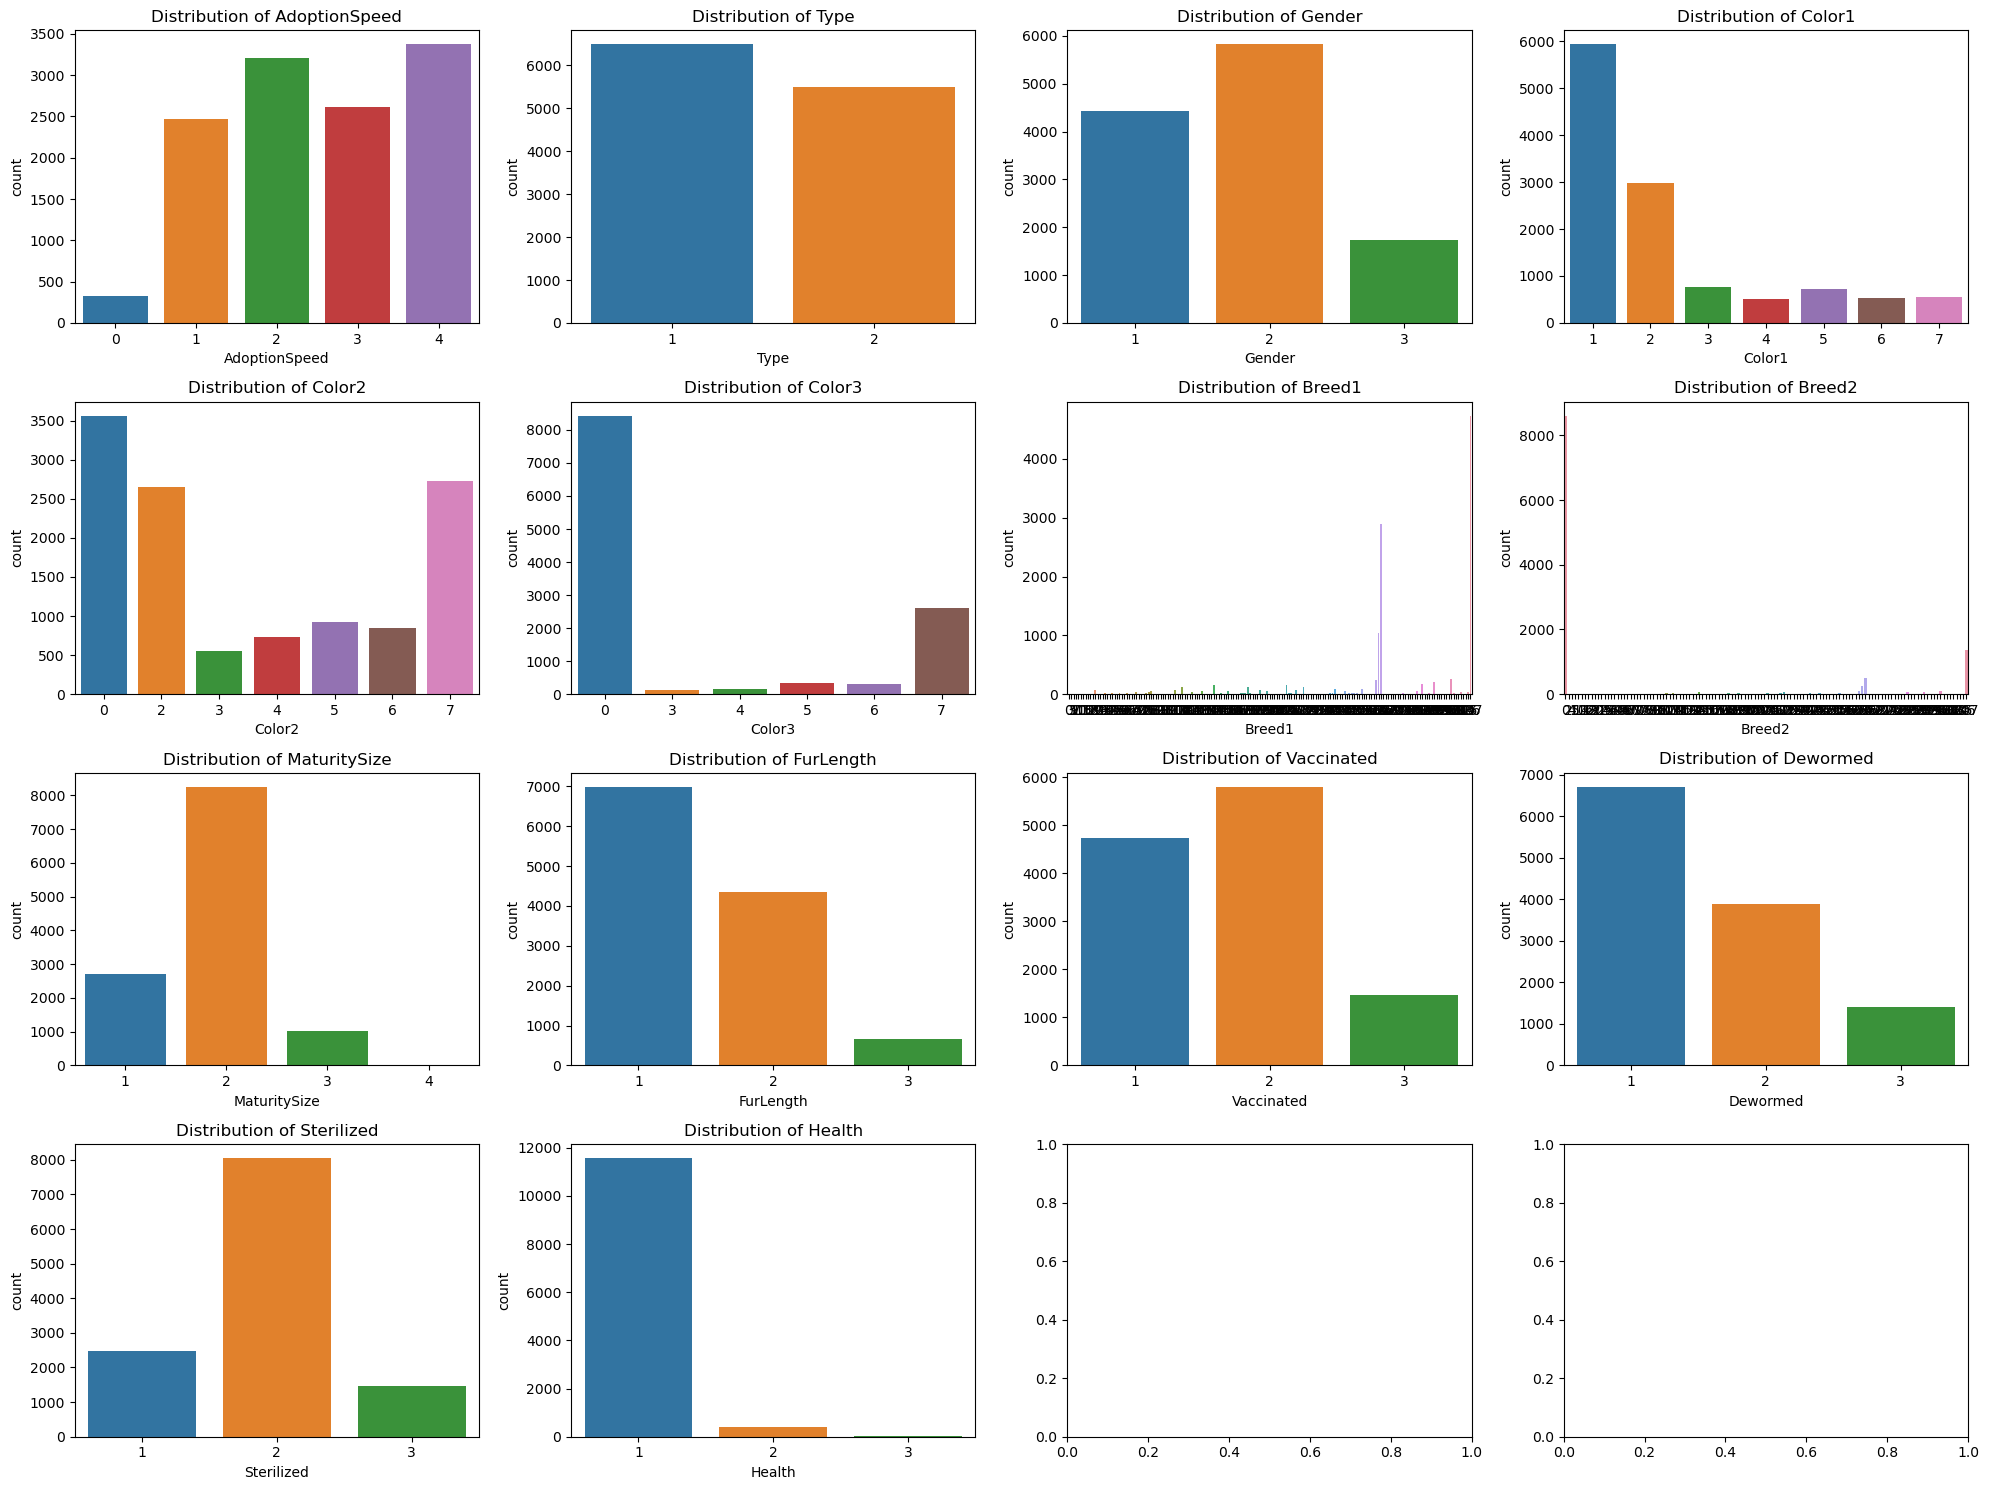

In [114]:
# Load the dataset
df = pd.read_csv('train_split.csv')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Visualize the distribution of the target variable
sns.countplot(x='AdoptionSpeed', data=df, ax=axes[0])
axes[0].set_title('Distribution of AdoptionSpeed')

# Visualize the distribution of categorical variables
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3','Breed1',
                    'Breed2','MaturitySize','FurLength','Vaccinated','Dewormed'
                    ,'Sterilized','Health']
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i+1])
    axes[i+1].set_title(f'Distribution of {col}')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

### Deal with imbalancing

In [115]:
# Classes are not balanced (class 0 in the AdoptionSpeed column has very low count with the perspective of other classes). 
# Use ROMC method to deal with class imbalance.

from imblearn.over_sampling import RandomOverSampler

# read the data
df = pd.read_csv('train_split.csv')

# split the train into features(X_train) and target(y_train)
X_train, y_train = df.drop('AdoptionSpeed', axis=1), df['AdoptionSpeed']

# apply ROMC (Random Oversampling Minority Class)
# Unlike SMOTE, ROMC does not require converting non-numeric features to numeric values.
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# save the data into .csv files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# combine the features and target into one dataframe
df = pd.concat([X_train, y_train], axis=1)

# save the data into .csv files
df.to_csv('train_balanced.csv', index=False)


### Distribution of variables after balancing

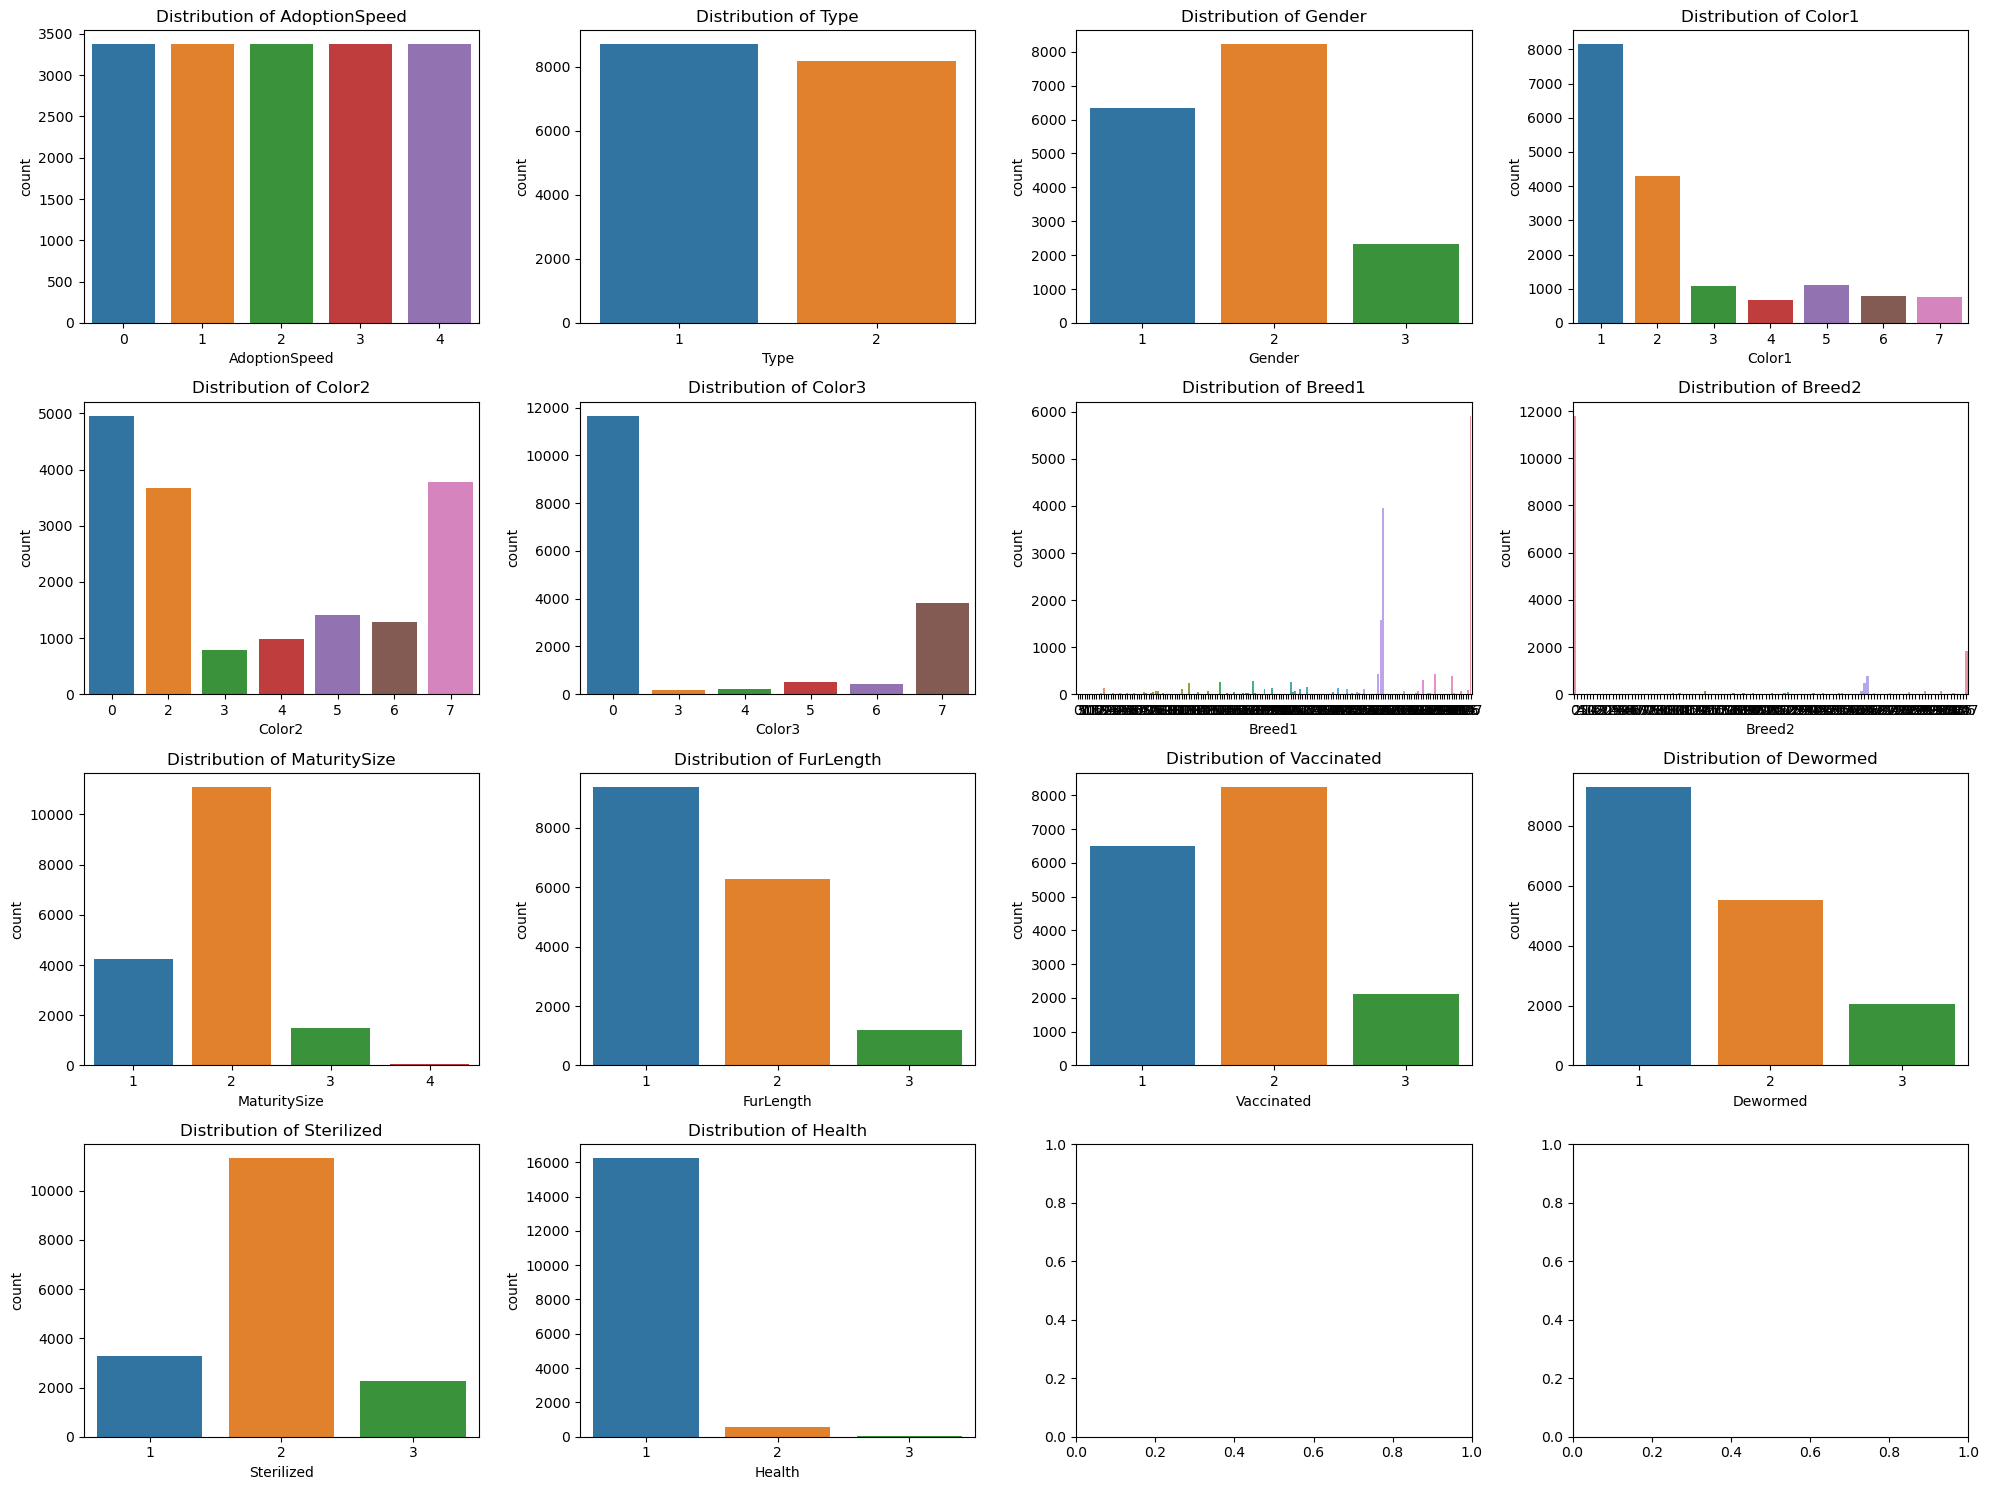

In [116]:
# Load the dataset
df = pd.read_csv('train_balanced.csv')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Visualize the distribution of the target variable
sns.countplot(x='AdoptionSpeed', data=df, ax=axes[0])
axes[0].set_title('Distribution of AdoptionSpeed')

# Visualize the distribution of categorical variables
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3','Breed1',
                    'Breed2','MaturitySize','FurLength','Vaccinated','Dewormed'
                    ,'Sterilized','Health']
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i+1])
    axes[i+1].set_title(f'Distribution of {col}')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

### Show variables with boxplot to see outliers

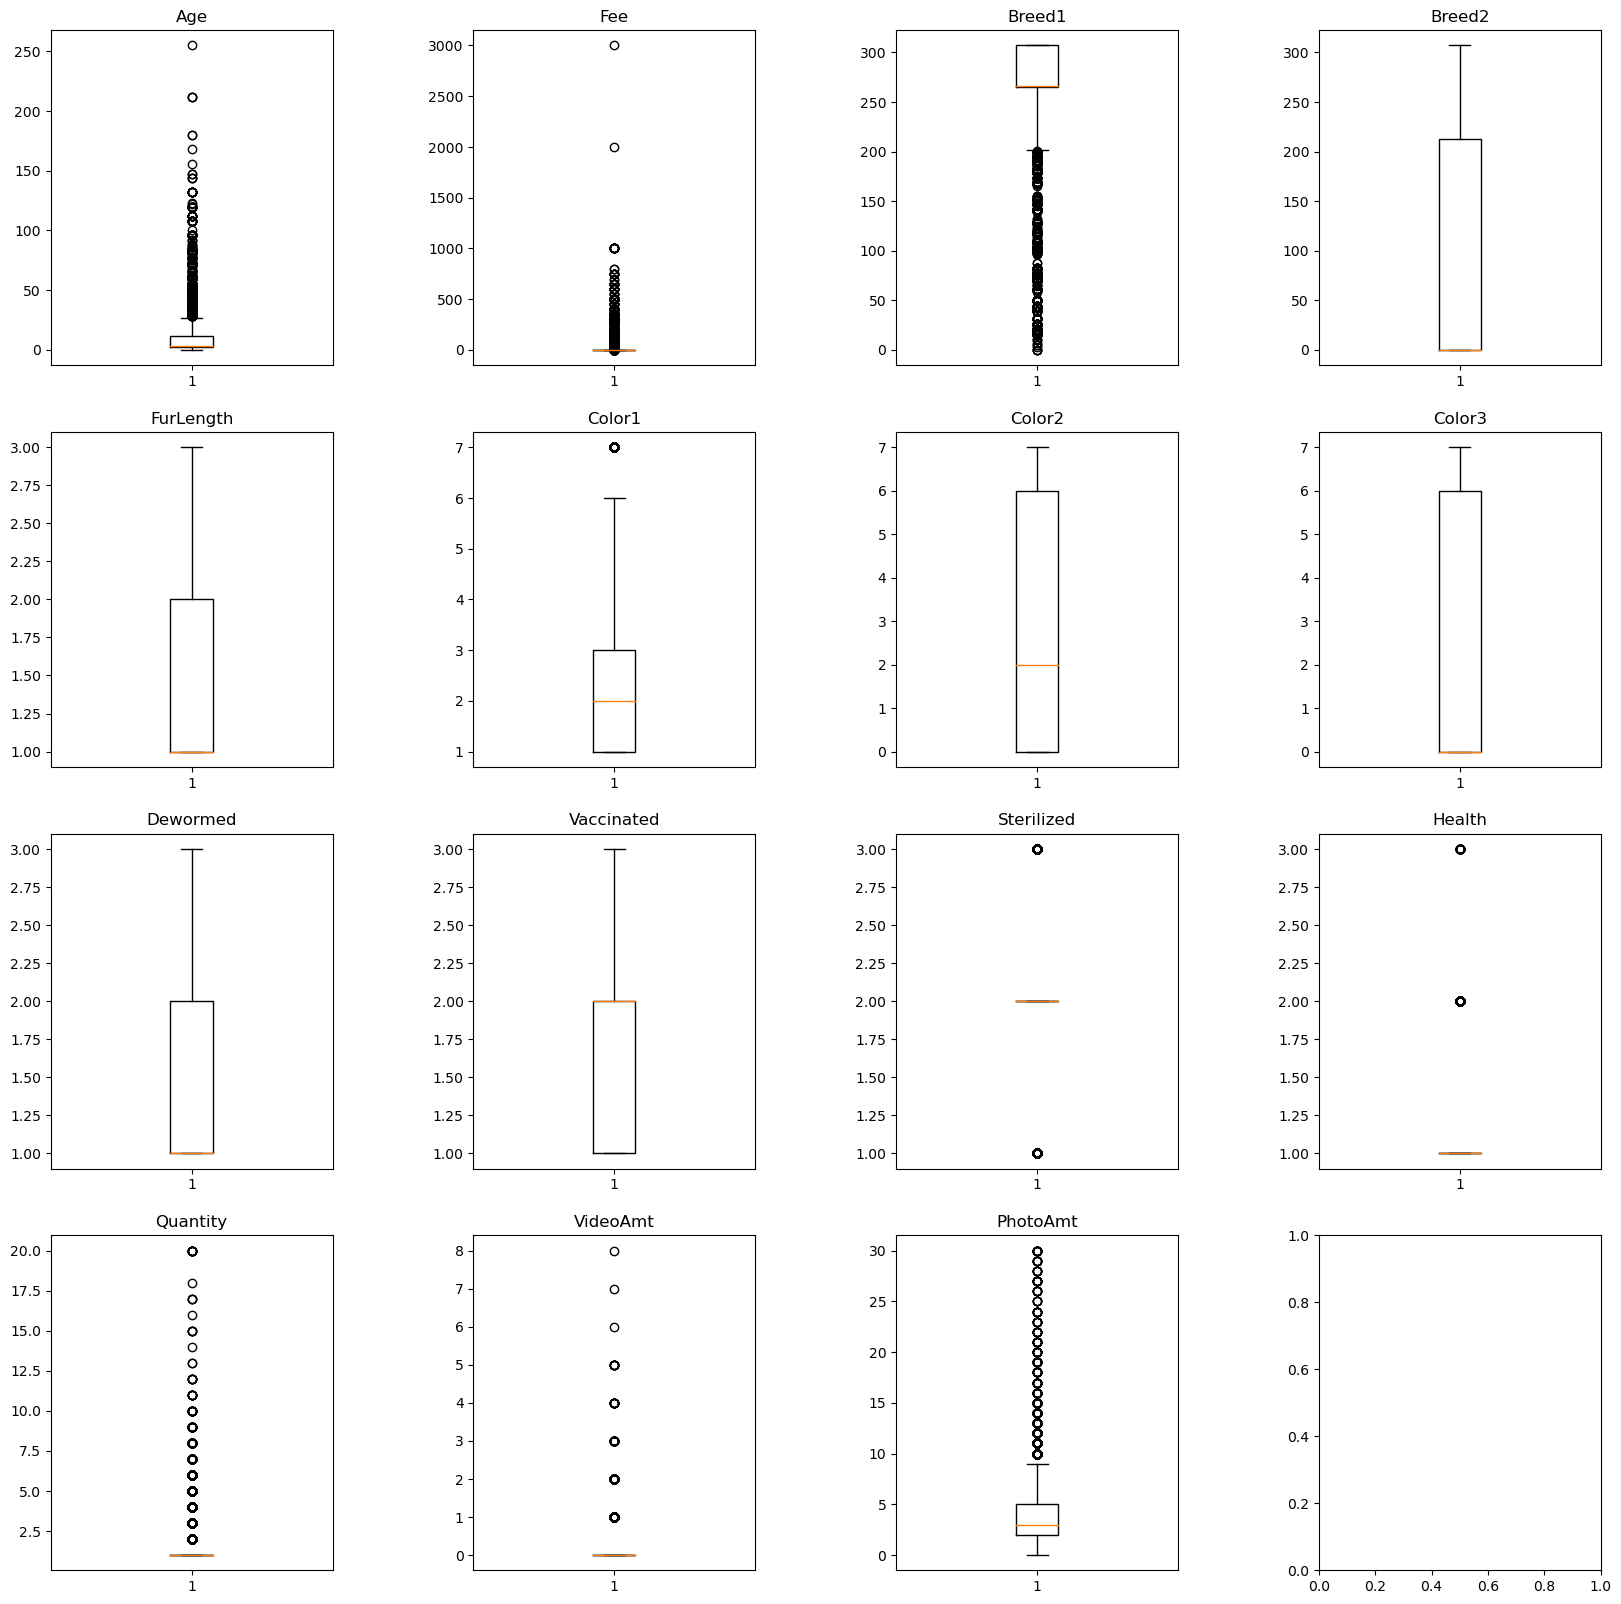

In [117]:
# Load the dataset
df = pd.read_csv('X_train.csv')

# Define the list of columns to plot
columns = ['Age', 'Fee', 'Breed1', 'Breed2', 'FurLength', 'Color1', 'Color2', 'Color3', 'Dewormed', 'Vaccinated', 'Sterilized', 'Health', 'Quantity', 'VideoAmt', 'PhotoAmt']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Iterate through the columns and plot the boxplots
for col, ax in zip(columns, axes.flatten()):
    ax.boxplot(df[col])
    ax.set_title(col)

# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.5)
plt.show()

### Correlation between all columns and the target variable

AdoptionSpeed    1.000000
Breed1           0.141014
Quantity         0.085047
MaturitySize     0.070624
Gender           0.067584
Age              0.057499
PhotoAmt         0.028268
Health           0.007055
VideoAmt         0.003336
State           -0.007478
Fee             -0.009151
Dewormed        -0.039450
Color3          -0.041145
Color2          -0.042324
Color1          -0.050121
Breed2          -0.051755
Vaccinated      -0.060514
Sterilized      -0.110679
Type            -0.123544
FurLength       -0.141303
Name: AdoptionSpeed, dtype: float64


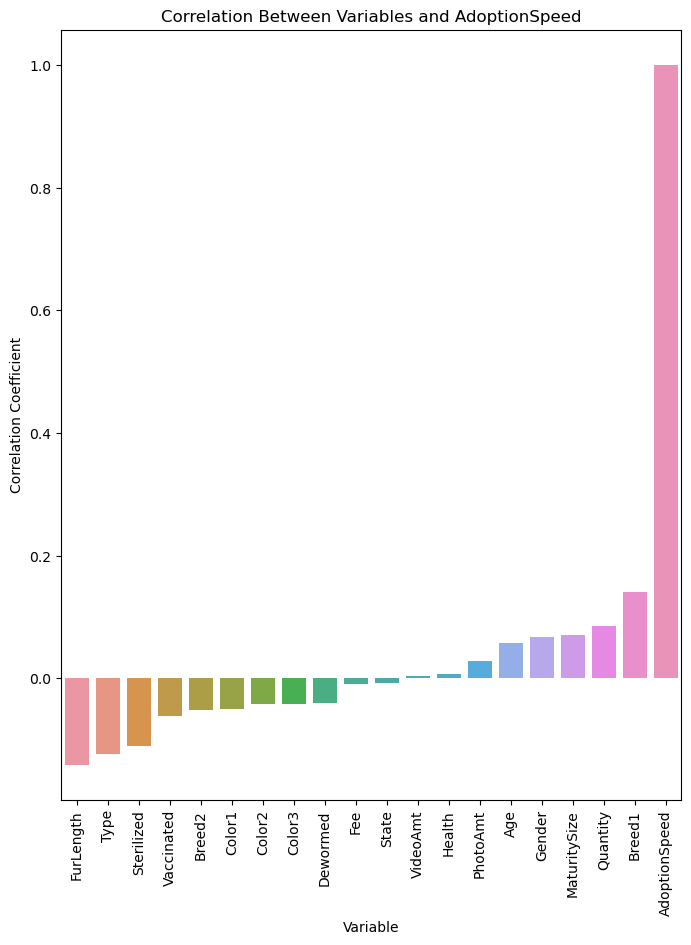

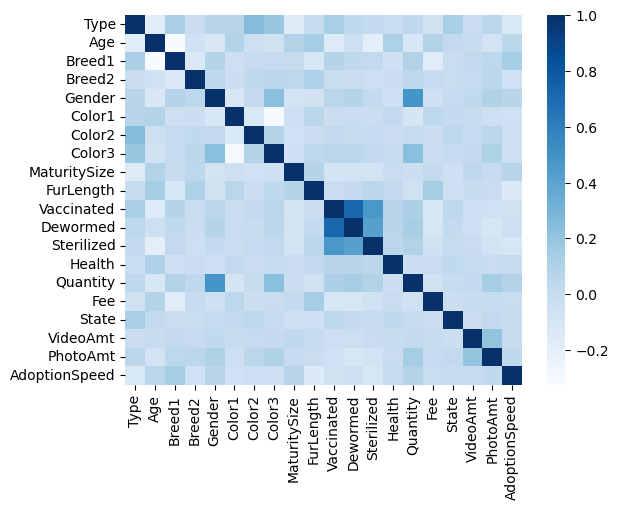

In [118]:
# Correlation between features and target variable (AdoptionSpeed) 
# Correlation between features and target variable can be used to select the most important features that have the highest correlation with the target variable 
# and remove the features that have low correlation with the target variable to reduce the dimensionality of the dataset and improve the model's performance 

# read the data
df = pd.read_csv('train_balanced.csv')

# print correlation of quantitative features with the target variable
print(df.corr()['AdoptionSpeed'][df.dtypes[df.dtypes != 'object'].index].sort_values(ascending=False))

# # Calculate the correlation coefficient between each variable and the target variable
# corr = df.corr()['AdoptionSpeed'].sort_values()

# # Visualize the correlation coefficients
# plt.figure(figsize=(8, 10))

# # draw barplot of correlation coefficients
# corr.plot(kind='barh', color='blue')

# # add title and axis labels
# plt.title('Correlation Coefficients')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')

# # show the plot
# plt.show()

# Calculate the correlation coefficient between each variable and the target variable
corr = df.corr()['AdoptionSpeed'].sort_values()

# Visualize the correlation coefficients
plt.figure(figsize=(8, 10))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Variables and AdoptionSpeed')
plt.show()

# show correlation matrix
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, cmap='Blues')
plt.show()

# correlation values:
# above 0: positive correlation (as one feature increases, the other feature increases)
# below 0: negative correlation (as one feature increases, the other feature decreases)
# 0: no correlation (as one feature increases, the other feature does not change)

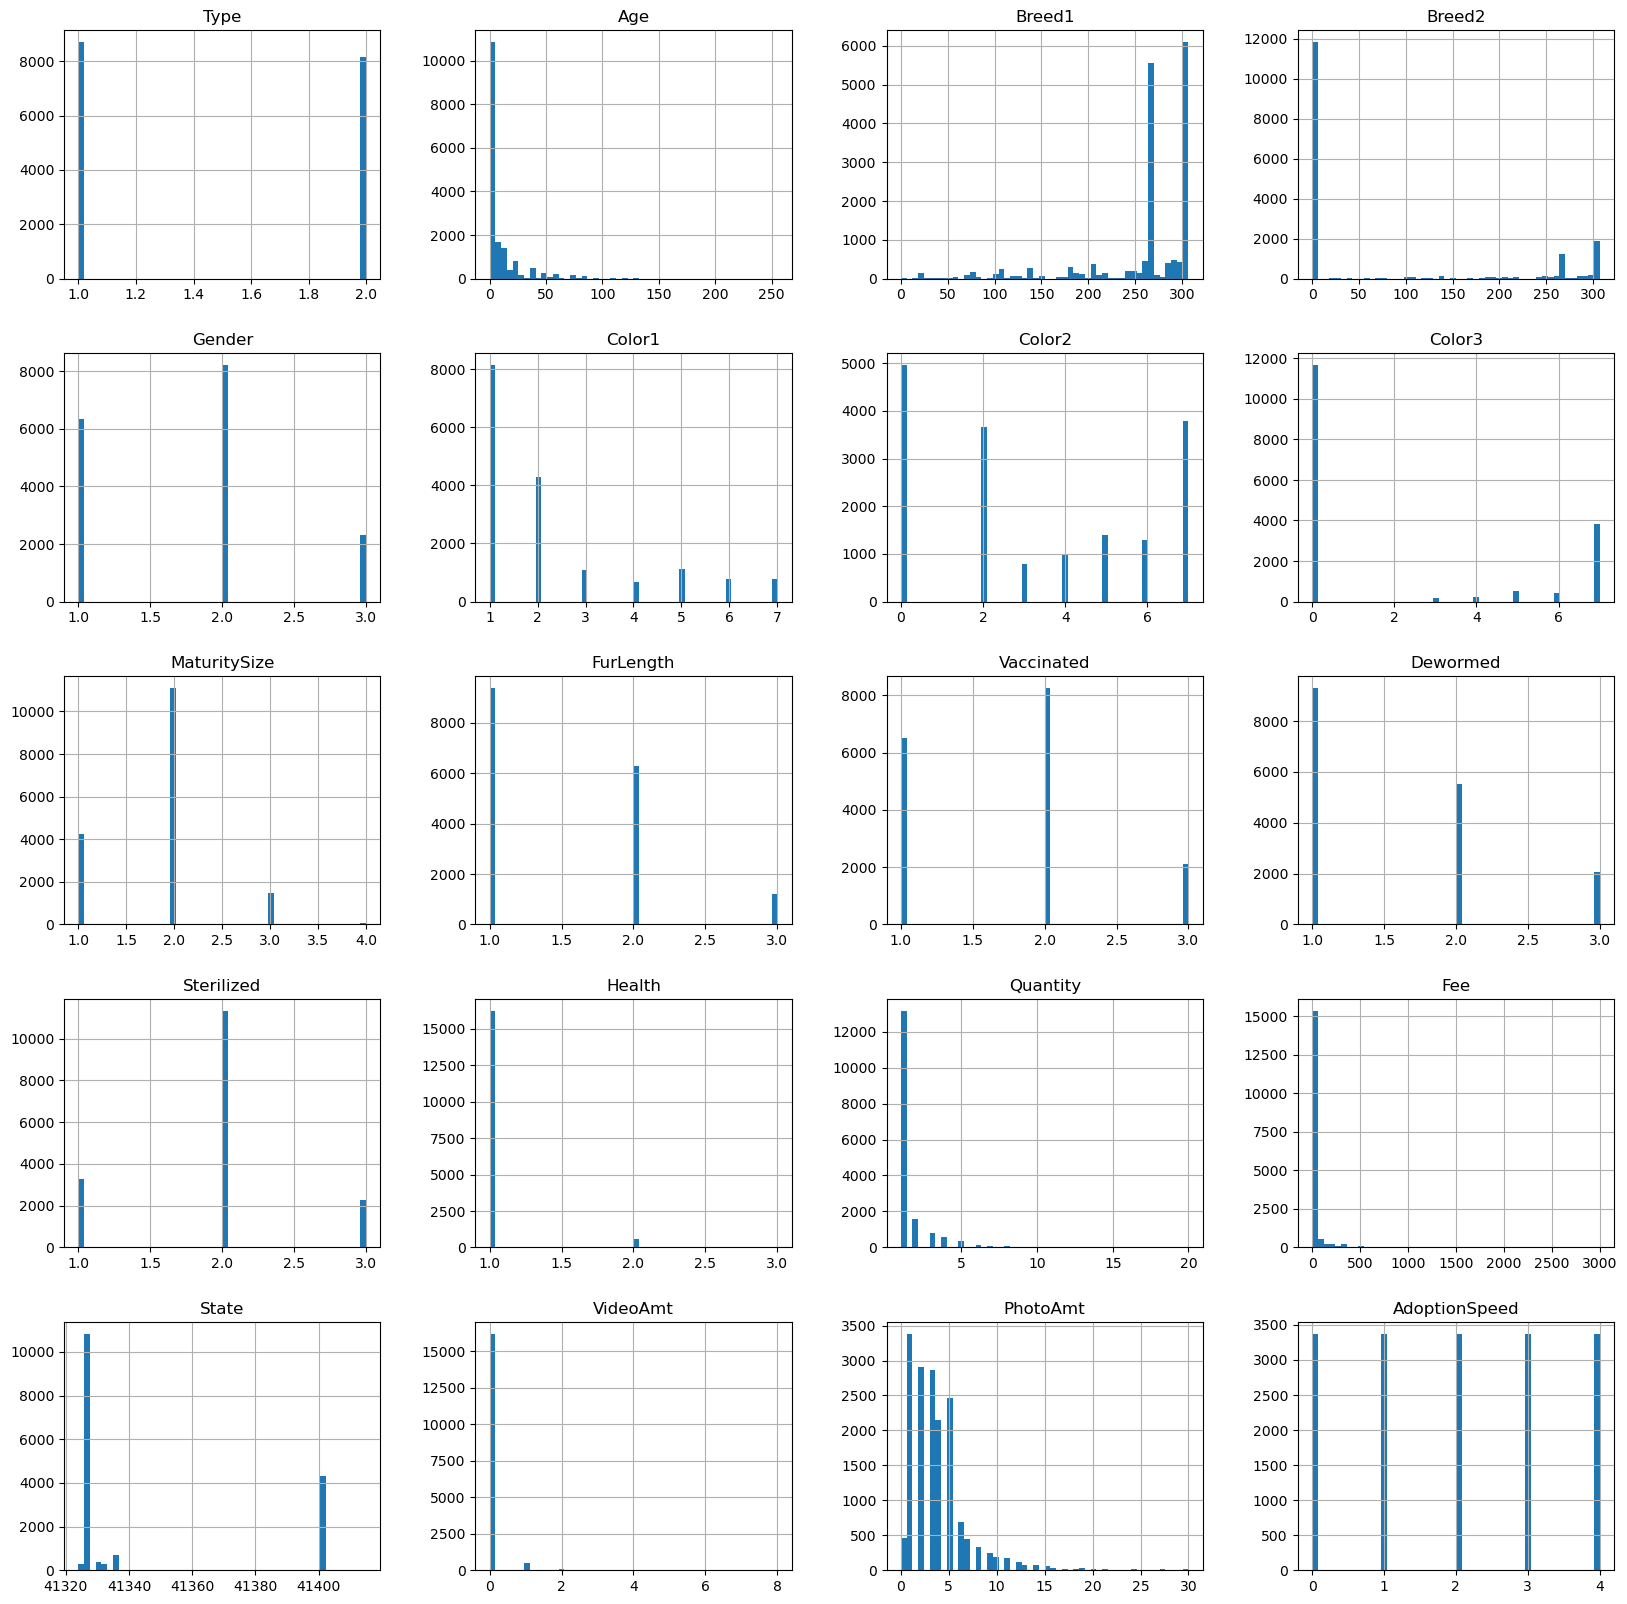

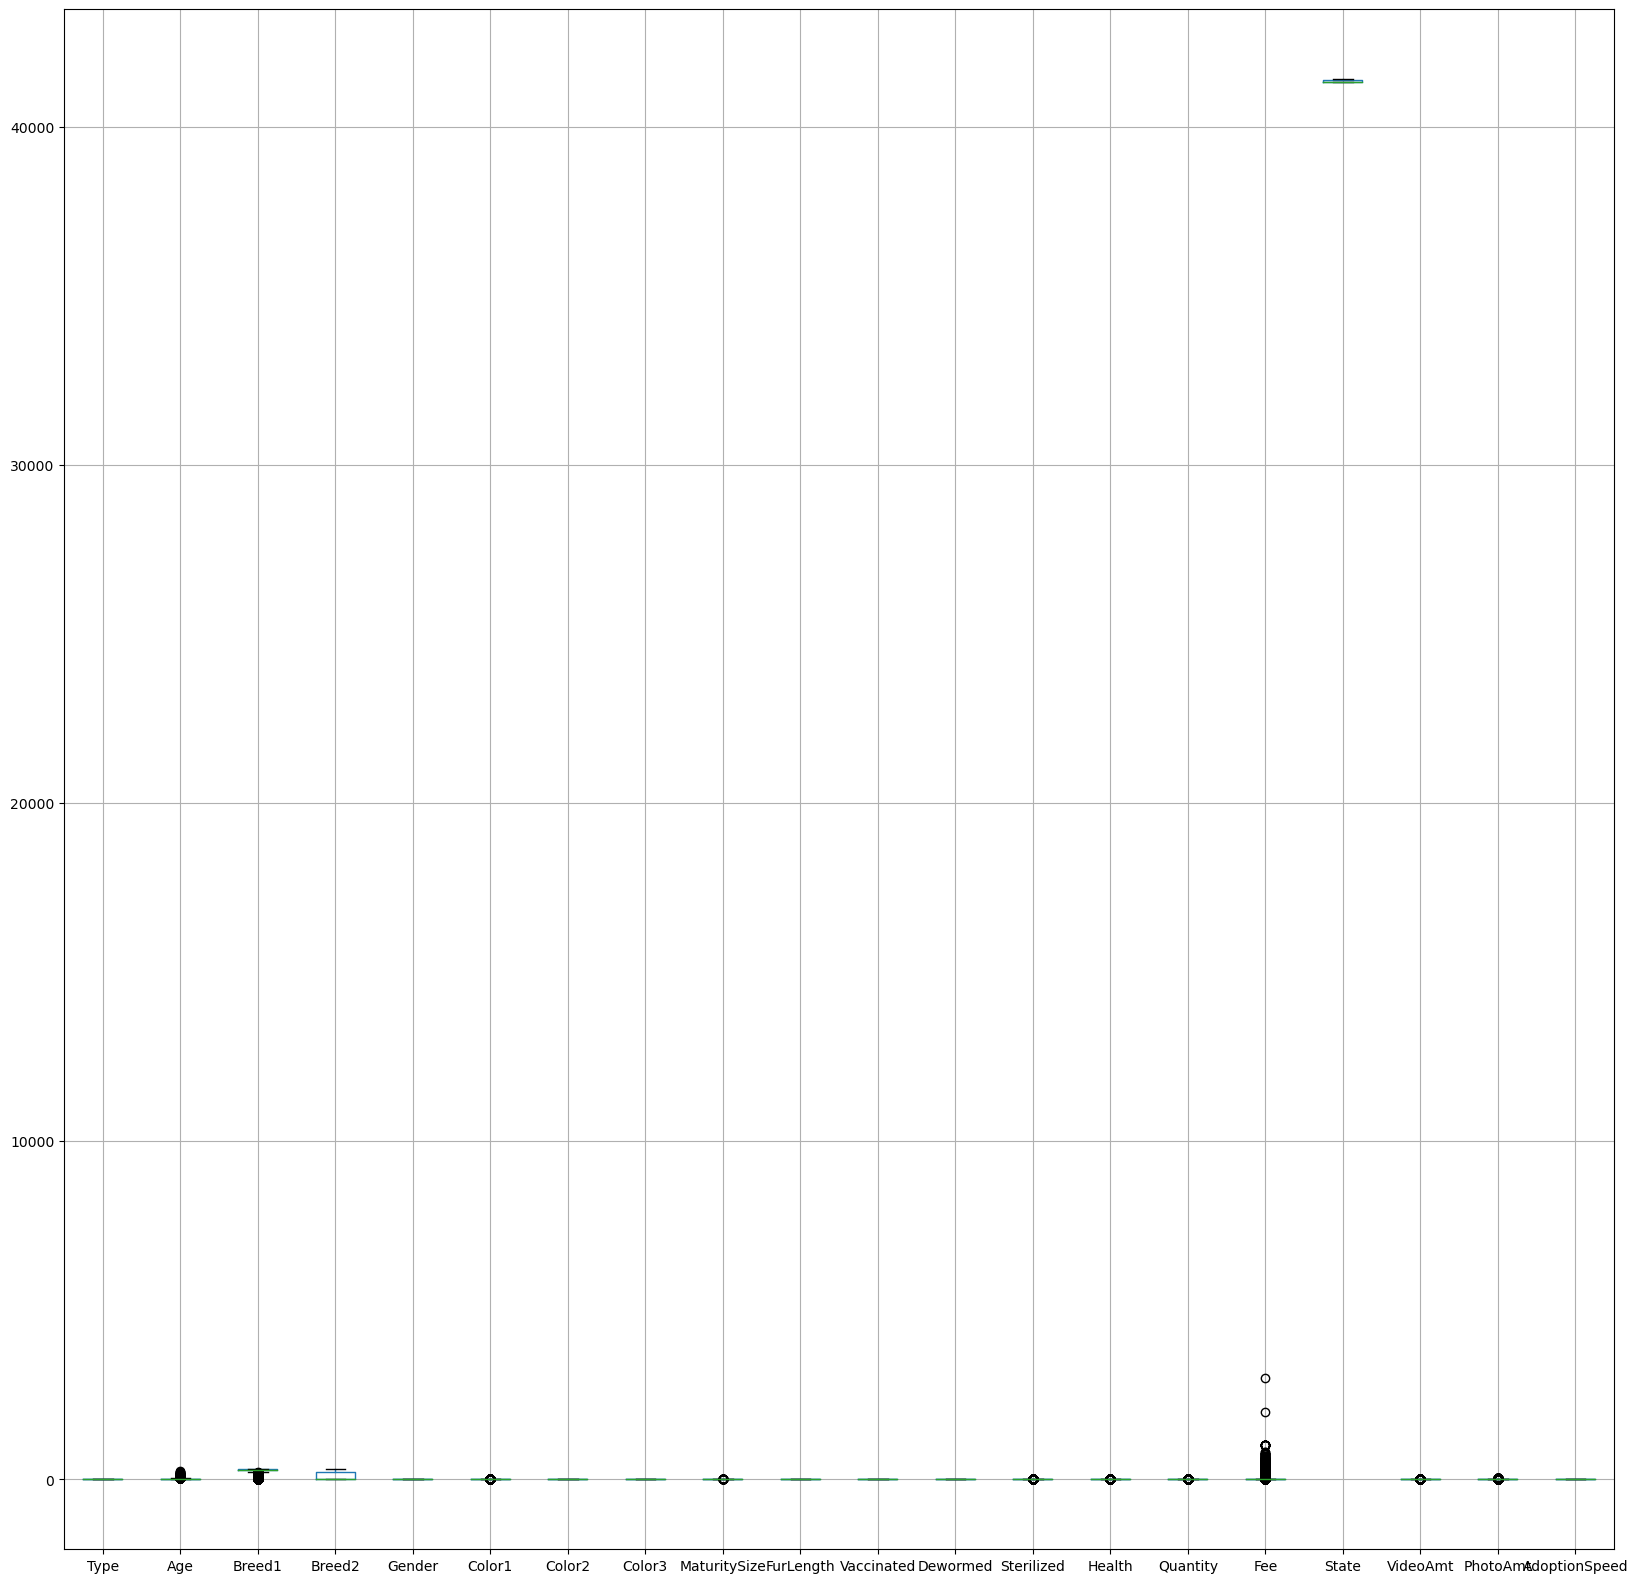

In [119]:
# draw distribution plot for each feature corresponding to its boxplot to check for any outlier in all columns
# read the data
df = pd.read_csv('train_balanced.csv')

distruibution_plot = df.hist(figsize=(20,20), bins=50)
plt.show()
boxplot = df.boxplot(figsize=(20,20))
plt.show()


### Select only those variables ('Breed1', 'Type','Age')
Chosen after many trials

In [120]:
# remove the uncorrelated features with the target variable (AdoptionSpeed) 

# read the data
df = pd.read_csv('train_balanced.csv')

# Select the top 3 columns to keep
columns = ['Breed1', 'Age' , 'Type', 'AdoptionSpeed']
df = df[columns]

# save the data into .csv files
df.to_csv('train_balanced_corr.csv', index=False)

In [121]:
# select those columns in the test set
# read the data
df = pd.read_csv('test_split.csv')

# Select the top 3 columns to keep
columns = ['Breed1', 'Age' , 'Type', 'AdoptionSpeed']
df = df[columns]

# save the data into .csv files
df.to_csv('test_split_corr.csv', index=False)

## Since there are lots of outliers, we shall use PCA, to get the most important features instead of removing outliers because they could be of high correlation with the target variable

In [123]:
import plotly.express as px
from sklearn.decomposition import PCA
# read the data
df = pd.read_csv('train_balanced_corr.csv')

# select all columns except the target variable
features = df.columns[:-1]

pca = PCA(n_components=3)

components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df['AdoptionSpeed']
)

fig.update_traces(diagonal_visible=False)
fig.show()


### Select the top 2 components with the highest variance


In [124]:

components = components[:, :2]
labels = [f"PC {i+1}" for i in range(components.shape[1]) ]
# Store components in a dataframe
components = pd.DataFrame(data=components, columns=labels)
# Add the target variable to the dataframe
components['AdoptionSpeed'] = df['AdoptionSpeed']

# Store in a file
components.to_csv('train_balanced_corr_pca.csv', index=False)


### Apply PCA to the test data

In [125]:
# Apply PCA to the test set

# read the data
df = pd.read_csv('test_split_corr.csv')

# select all columns except the target variable
features = df.columns[:-1]

pca = PCA(n_components=2)

components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df['AdoptionSpeed']
)

fig.update_traces(diagonal_visible=False)
fig.show()


labels = [f"PC {i+1}" for i in range(components.shape[1]) ]
# Store components in a dataframe
components = pd.DataFrame(data=components, columns=labels)
# Add the target variable to the dataframe
components['AdoptionSpeed'] = df['AdoptionSpeed']

# Store in a file
components.to_csv('test_split_corr_pca.csv', index=False)

